L_train:
 [ 78.43304467  42.25108984  35.14717393  32.77935145  31.32005645
  30.12965796  29.07692504  28.11998625  27.2378309   26.41723935
  25.64915799  24.92710788  24.24627655  23.60295206  22.99416141
  22.41743751  21.87066835  21.35199858  20.85976499  20.39245351
  19.94867031  19.52712183  19.1266007   18.74597554  18.38418315
  18.0402225   17.71314983  17.40207449  17.10615538  16.82459785
  16.55665079  16.30160412  16.05878634  15.82756237  15.60733145
  15.39752523  15.19760596  15.00706477  14.82542009  14.65221613
  14.48702146  14.32942766  14.17904807  14.03551662  13.89848664
  13.76762987  13.6426354   13.52320877  13.40907104  13.29995797
  13.19561923  13.09581759  13.00032832  12.90893838  12.82144592
  12.73765957  12.65739796  12.58048912  12.50677002  12.43608607
  12.36829066  12.30324477  12.24081651  12.1808808   12.12331897
  12.06801841  12.0148723   11.96377924  11.91464301  11.86737227
  11.82188032  11.77808484  11.73590767  11.69527459  11.65611509


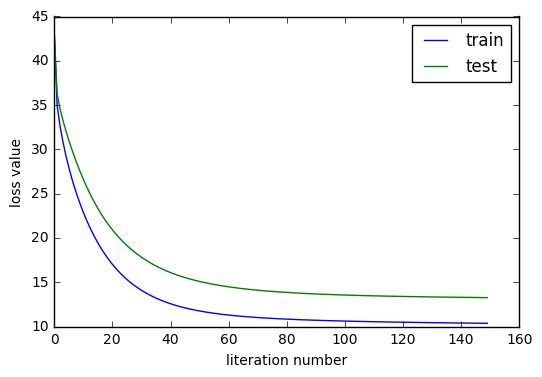

In [17]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack 
import matplotlib.pyplot as plt
%matplotlib inline

def data_loader(train_file):
    X,Y = load_svmlight_file(train_file)
    #housing_scale中有506个数据
    one = np.ones(506).reshape(506,1)#one是506行1列的矩阵
    X = hstack( [X, csr_matrix(one)] ).todense()
    Y = np.array(Y).reshape(506,1)
    return X, Y

def train(X, Y):
    Y_prediction = X.dot(theta)
    loss=1/2/(506*0.7) * (np.dot( (Y - Y_prediction).transpose(), Y - Y_prediction )).sum()
    return loss

def test(X_test,Y_test):
    Y_prediction = X_test.dot(theta)
    loss=1/2/(506*0.3) * (np.dot( (Y_test - Y_prediction).transpose(), Y_test - Y_prediction )).sum()
    return loss

if __name__ =="__main__":
    X,Y = data_loader("housing_scale")
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)#划分数据集
    theta = np.zeros((X_train.shape[1], 1)) 
    L_train = np.zeros((150))
    L_validation = np.zeros((150))
    learning_rate = 0.000350
    for t in range(150):
        Y_prediction = X_train.dot(theta)
        G = -np.dot(X_train.transpose(),  Y_train ) + np.dot(X_train.transpose(),Y_prediction) 
        theta -= learning_rate * G
        L_train [t]=train(X_train, Y_train)
        L_validation[t]=test(X_test,Y_test)

    print('L_train:\n',L_train)
    print('L_validation:\n',L_validation)
    plt.plot(loss1,label='train')
    plt.plot(loss2,label='test')
    plt.ylabel('loss value')
    plt.xlabel('literation number')
    plt.legend() 
